<a href="https://colab.research.google.com/github/lmly303/Ml-Learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df = df.replace('yes', 1)
df = df.replace('no', 0)
df = df.replace('furnished', 1)
df = df.replace('semi-furnished', 0)
df = df.replace('unfurnished', -1)

<ipython-input-4-144c08ca5f7c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('no', 0)
<ipython-input-4-144c08ca5f7c>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('unfurnished', -1)


In [5]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,-1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [6]:
# independent features and dependent features
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df[['price']]

In [7]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)

In [10]:
X_test = scaler.transform(X_test)

Key Difference

fit_transform()

**What it does?**	Learns and applies transformation

**When to use?** On training data

transform()

**What it does?** Only applies transformation

**When to use?** On test/new data

To Convert the data to original values use **scaler.inverse_transform()**

In [11]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [12]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
mse

array([-1.59070148e+12, -1.02486474e+12, -6.91921860e+11, -7.98987815e+11,
       -6.57673169e+11, -6.44738015e+11, -1.74217984e+12, -1.06876143e+12,
       -1.19449840e+12, -1.35209888e+12])

In [14]:
np.mean(mse)

np.float64(-1076642561246.7588)

In [15]:
reg_pred = model.predict(X_test)

In [16]:
reg_pred

array([[5407508.87024418],
       [7097185.46706854],
       [3055462.44314054],
       [4476945.19636315],
       [3315983.6566358 ],
       [3618373.03255258],
       [5758111.46044026],
       [6466502.43909127],
       [2830273.16469119],
       [2588804.65810569],
       [9649589.31414052],
       [2830606.51113843],
       [3048137.62898116],
       [3392779.60203049],
       [3823232.9673009 ],
       [5358170.87034032],
       [2955016.4157815 ],
       [4836054.53230682],
       [4603068.47740645],
       [3551464.60674927],
       [5625018.82657786],
       [5796938.54363455],
       [2758483.74755247],
       [4873266.20950522],
       [5600804.93370714],
       [7772078.63540936],
       [3381536.16270184],
       [5370732.06725798],
       [8352665.95879415],
       [3406110.06934799],
       [6335677.41367624],
       [3427228.10570009],
       [6740746.88053742],
       [4205633.93578767],
       [3624702.80095918],
       [5797171.46441146],
       [5080025.13346592],
 

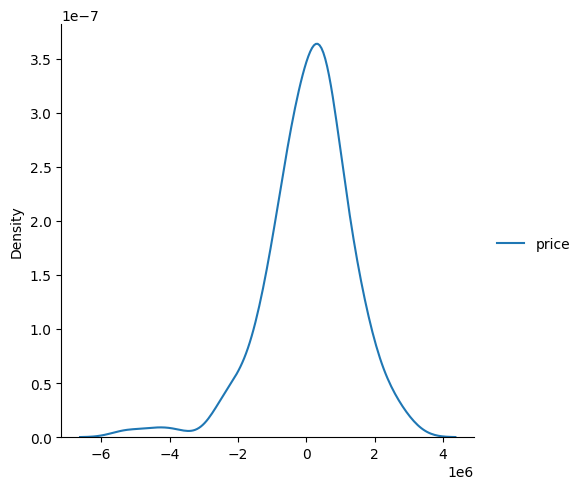

In [17]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [18]:
from sklearn.metrics import r2_score
score = r2_score(reg_pred, y_test)
score

0.40020527223056357

# **Ridge Regression Algorithm**

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [22]:
ridge_model=Ridge()

In [23]:
ridge_parameters ={'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
ridge_cv=GridSearchCV(ridge_model,ridge_parameters,cv=10)
ridge_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]})

In [24]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 80}
0.6115637019480049


In [36]:
ridge_pred = ridge_cv.predict(X_test)
ridge_pred = ridge_pred.reshape(-1,1)

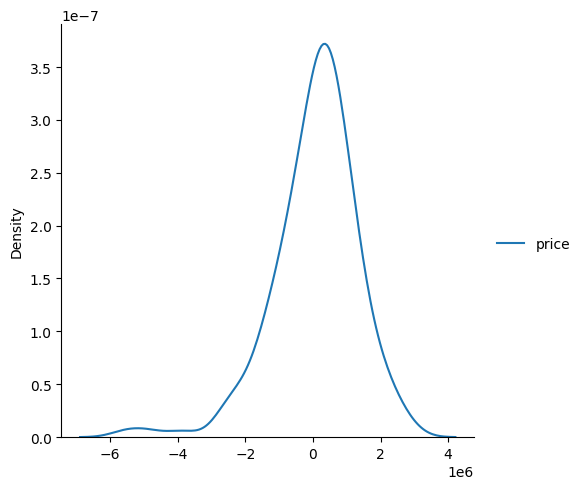

In [37]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [38]:
score = r2_score(ridge_pred, y_test)
score

0.2547993097721166